In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
wine = pd.read_csv("Downloads/winequality-red.csv",sep = ";")

In [85]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


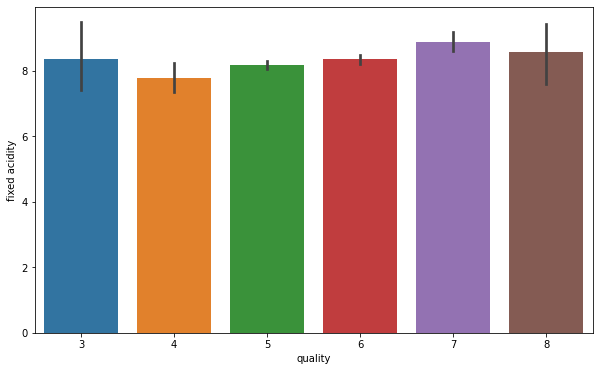

In [87]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

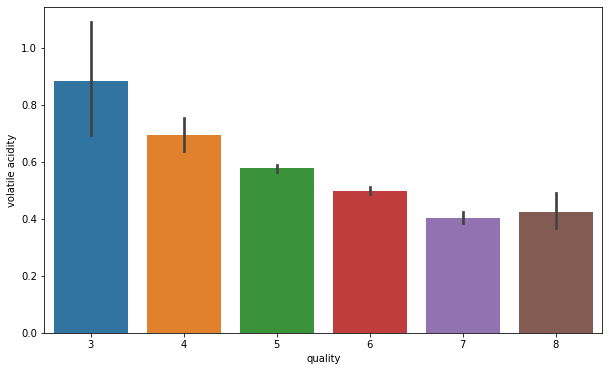

In [88]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

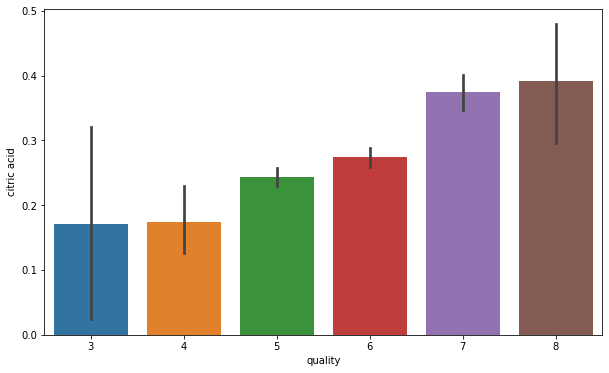

In [89]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

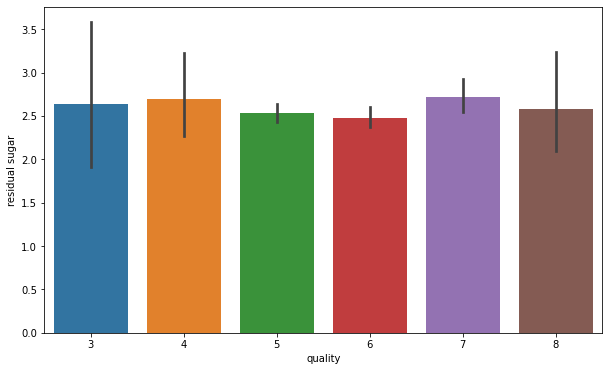

In [90]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

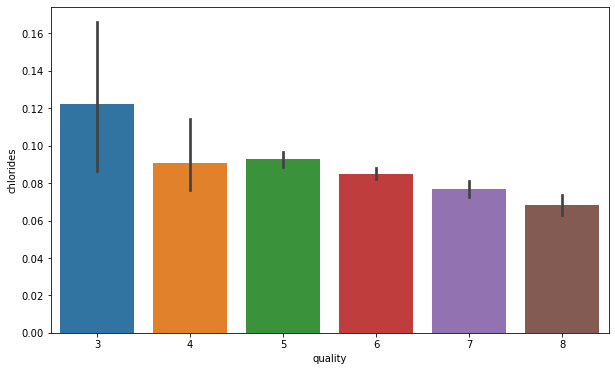

In [91]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

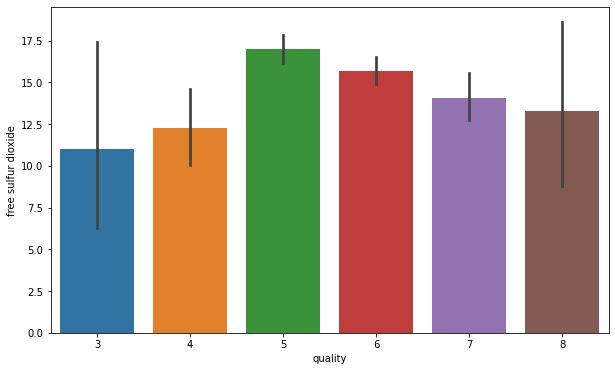

In [92]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

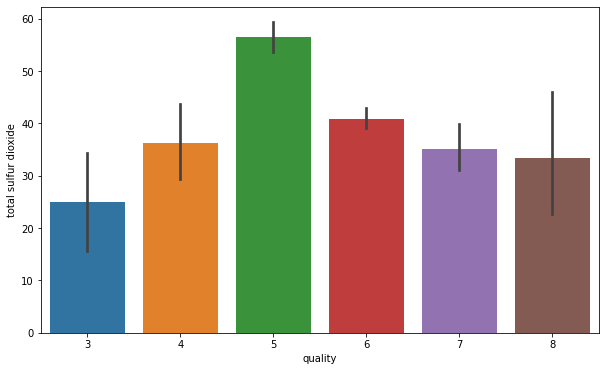

In [93]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

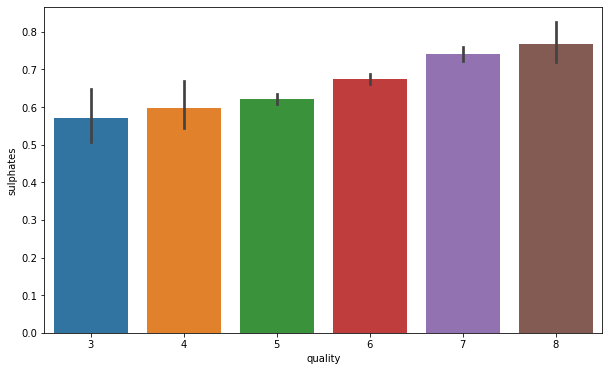

In [94]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

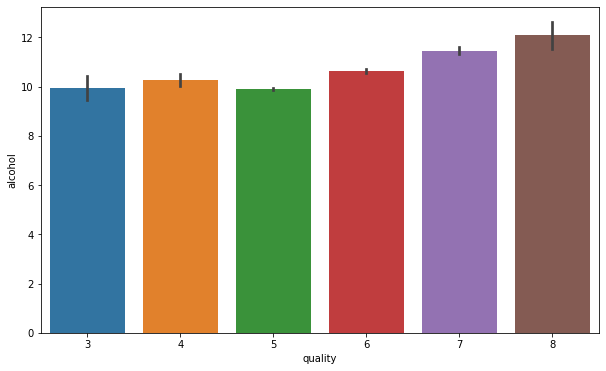

In [95]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

preprocessing data

In [96]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
label_quality = LabelEncoder()

In [99]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [100]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

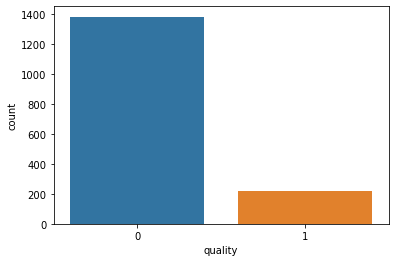

In [101]:
sns.countplot(wine['quality'])

In [102]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

linear kernal

In [106]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [107]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



C:\Users\Susmisatya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


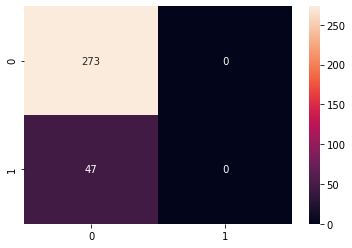

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

Polynomial Kernel

In [109]:
svc = SVC(kernel = "poly")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [110]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



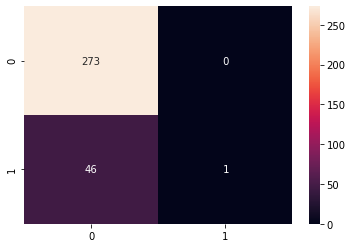

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

Gaussian Kernel

In [112]:
svc = SVC(kernel = "rbf")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



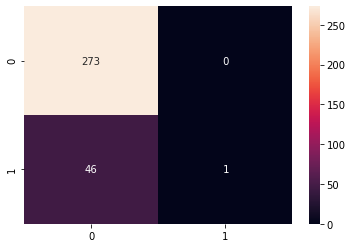

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

Sigmoid Kernel

In [114]:
svc = SVC(kernel = "sigmoid")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [115]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



C:\Users\Susmisatya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


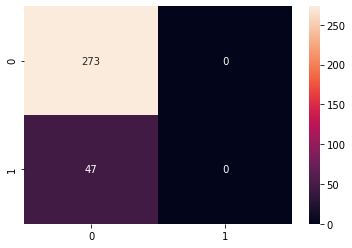

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [117]:
# precomputed cant be done on this dataset because it uses square matrix

In [118]:

kernal_name = ["linear", "poly", "rbf", "sigmoid"]

acc = [0.85,0.86,0.86,0.85]
d = {}
d={'kernal':kernal_name,'Accuracy':acc}
print(d)

{'kernal': ['linear', 'poly', 'rbf', 'sigmoid'], 'Accuracy': [0.85, 0.86, 0.86, 0.85]}


In [119]:
pd.DataFrame(d)

,kernal,Accuracy
0,linear,0.85
1,poly,0.86
2,rbf,0.86
3,sigmoid,0.85


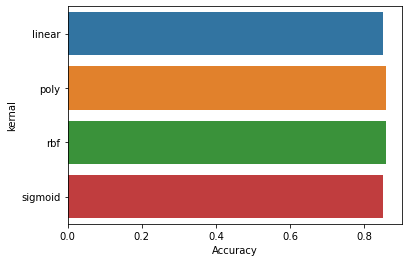

In [120]:
sns.barplot(y='kernal',x='Accuracy',data=pd.DataFrame(d))

C:\Users\Susmisatya\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Susmisatya\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


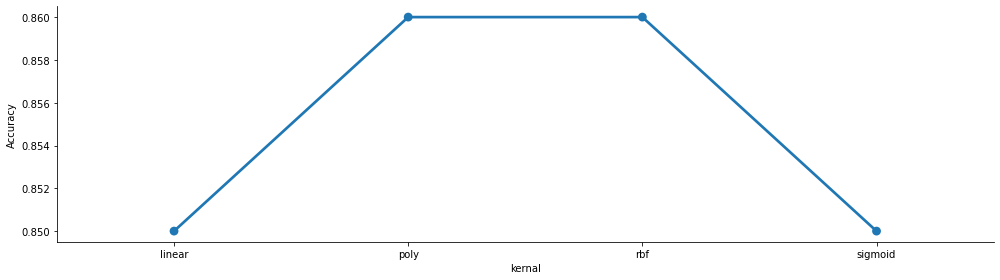

In [121]:
sns.factorplot(x='kernal',y='Accuracy',data=pd.DataFrame(d),kind='point',size=4,aspect=3.5)

In [122]:
# using standardscalar for increasing accuracy

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Gaussian Kernel

In [124]:
svc = SVC(kernel = "rbf")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



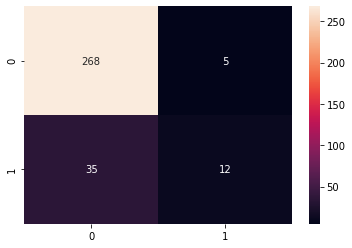

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

linear kernal

In [126]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



C:\Users\Susmisatya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


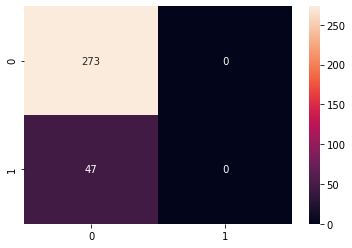

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

polynomial kernal

In [128]:
svc = SVC(kernel = "poly")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.68      0.32      0.43        47

    accuracy                           0.88       320
   macro avg       0.79      0.65      0.68       320
weighted avg       0.86      0.88      0.86       320



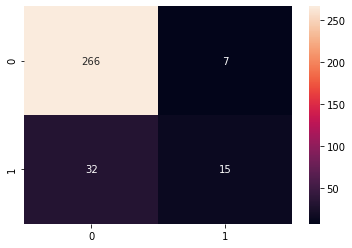

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

Sigmoid Kernel

In [130]:
svc = SVC(kernel = "sigmoid")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       273
           1       0.28      0.23      0.26        47

    accuracy                           0.80       320
   macro avg       0.58      0.57      0.57       320
weighted avg       0.79      0.80      0.79       320



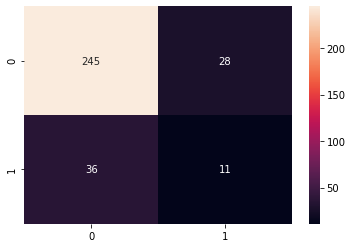

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [132]:
acc_s = [0.85,0.88,0.88,0.80]
d={'kernal':kernal_name,'Accuracy':acc_s}
print(d)

{'kernal': ['linear', 'poly', 'rbf', 'sigmoid'], 'Accuracy': [0.85, 0.88, 0.88, 0.8]}


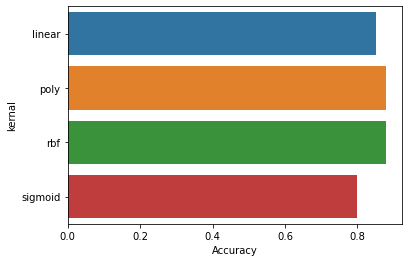

In [133]:
sns.barplot(y='kernal',x='Accuracy',data=pd.DataFrame(d))

C:\Users\Susmisatya\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Susmisatya\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


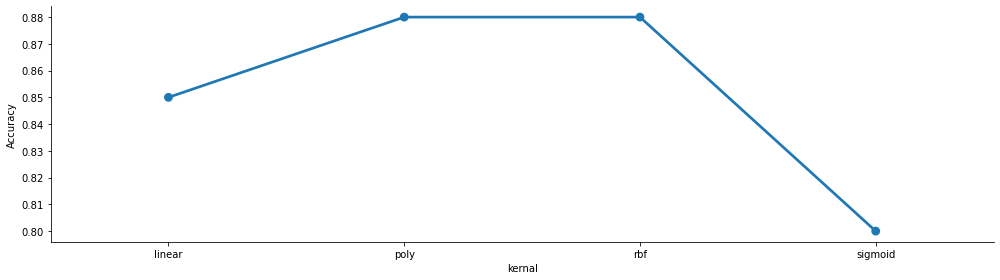

In [134]:
sns.factorplot(x='kernal',y='Accuracy',data=pd.DataFrame(d),kind='point',size=4,aspect=3.5)